In [1]:
#Classification Systems

In [ ]:
pip install matplotlib

In [ ]:
pip install pandas

In [ ]:
pip install --upgrade scikit-learn

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784',version=1,parser = 'auto')

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X,y = mnist["data"],mnist["target"]

In [6]:
# There are 70000 images and each image has 784 features because each image is 28x28 pixels
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [9]:
if isinstance(X, pd.DataFrame):
    X = X.to_numpy()

if isinstance(y, pd.Series):
    y = y.to_numpy()

In [10]:
some_digit = X[0]


In [16]:
some_digit_image = some_digit.reshape(28,28)

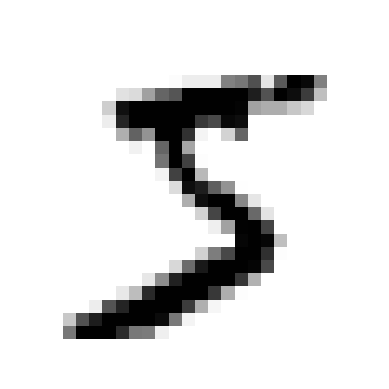

In [17]:
plt.imshow(some_digit_image,cmap="binary")
plt.axis("off")
plt.show()

In [18]:
# The above image looks like a five and that is what this label also tells us
y[0]

'5'

In [19]:
# Now that the label is a string but most ML algos expect numbers so we cast y as an integer
y = y.astype(np.uint8)

In [20]:
# We created a training and a test set which has already been shuffled for us so we dont need to randomise it
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [21]:
# Training a Binary Classifier [ A 5-detector ]

In [25]:
y_train_5 = (y_train == 5)

In [27]:
y_test_5 = (y_test == 5)

In [29]:
from sklearn.linear_model import SGDClassifier

In [35]:
#The SGDClassifier relies on randomness during training. So to get reproducible results we set the random_state parameter.
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [37]:
sgd_clf.predict([some_digit])

array([ True])

In [38]:
#Measuring accuracy using cross-validation

In [40]:
#Using cross_val_score in built function from Scikit-Learn

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
cross_val_score(sgd_clf,#Our sgd model we just trained
                X_train,#training examples
                y_train_5,#targets
                cv=3,#No of folds =3
                scoring="accuracy")
#prints out the acccuracy of each fold

array([0.95035, 0.96035, 0.9604 ])

In [43]:
#implementing cross verification

In [44]:
from sklearn.model_selection import StratifiedKFold

In [45]:
from sklearn.base import clone

In [46]:
skfolds = StratifiedKFold(n_splits=3)

In [47]:

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) # prints 0.9502, 0.96565, and 0.96495

0.95035
0.96035
0.9604


In [48]:
#a not-5 clasifier

In [49]:
from sklearn.base import BaseEstimator

In [50]:
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [51]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [52]:
#Confusion Matrix
# The general idea is to count the number of times instances of class A are
# classified as class B. For example, to know the number of times the classifier confused
# images of 5s with 3s, you would look in the fifth row and third column of the confu‐
# sion matrix.

In [53]:
from sklearn.model_selection import cross_val_predict

In [54]:
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [57]:
from sklearn.metrics import precision_score, recall_score

In [58]:
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [59]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [60]:
from sklearn.metrics import f1_score

In [61]:
f1_score(y_train_5,y_train_pred)

0.7325171197343847

In [62]:
#Precision/ Recall Trade-Off

In [63]:
y_scores = sgd_clf.decision_function([some_digit])

In [64]:
y_scores

array([2164.22030239])

In [65]:
threshold = 0

In [66]:
y_some_digit_pred = (y_scores > threshold)

In [67]:
threshold = 8000

In [68]:
y_some_digit_pred = (y_scores>threshold)

In [69]:
y_some_digit_pred

array([False])

In [70]:
# This confirms that raising the threshold decreases recall. The image actually repre‐
# sents a 5, and the classifier detects it when the threshold is 0, but it misses it when the
# threshold is increased to 8,000.

In [71]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
method="decision_function")

In [72]:
from sklearn.metrics import precision_recall_curve

In [73]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

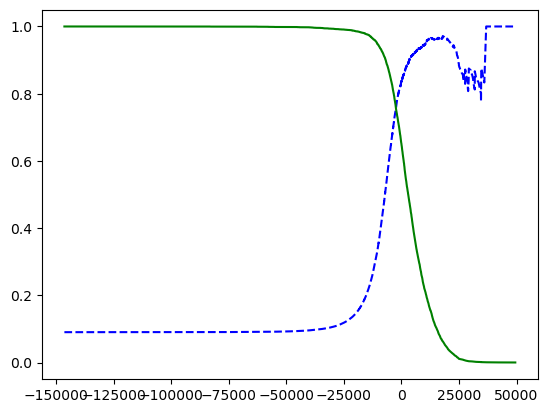

In [74]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
     # highlight the threshold and add the legend, axis label, and grid
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [75]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
y_train_pred_90 = (y_scores>=threshold_90_precision)

In [76]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [77]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

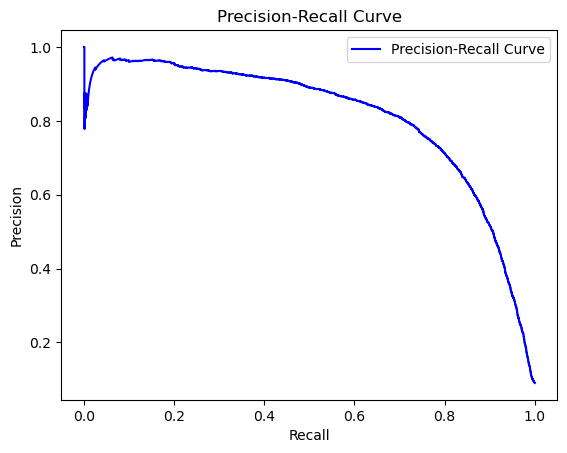

In [78]:
plt.plot(recalls, precisions, "b-", label="Precision-Recall Curve")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
# plt.grid(True)

plt.show()

In [79]:
# The ROC Curve

In [80]:
from sklearn.metrics import roc_curve

In [81]:
fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)

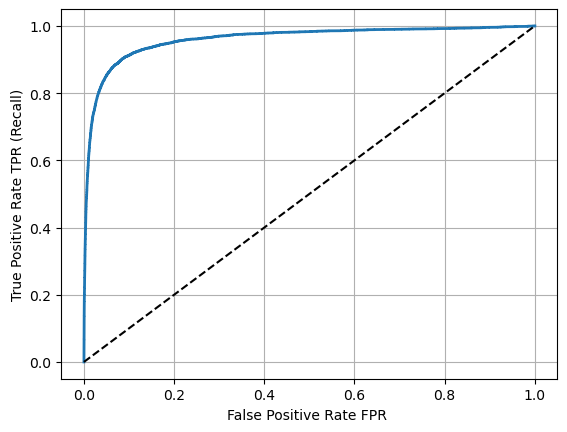

In [82]:
def plot_roc_curve(fpr,tpr,label = None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlabel("False Positive Rate FPR ")
    plt.ylabel("True Positive Rate TPR (Recall)")
    plt.grid(True)

plot_roc_curve(fpr, tpr)
plt.show()

In [83]:
# Once again there is a trade-off: the higher the recall (TPR), the more false positives
# (FPR) the classifier produces. The dotted line represents the ROC curve of a purely
# random classifier; a good classifier stays as far away from that line as possible (toward
# the top-left corner).

In [84]:
# Function to measure area under curve

In [85]:
from sklearn.metrics import roc_auc_score

In [86]:
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

# Random Forest Classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
forest_clf = RandomForestClassifier(random_state=42)

In [92]:
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method = "predict_proba")

In [93]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

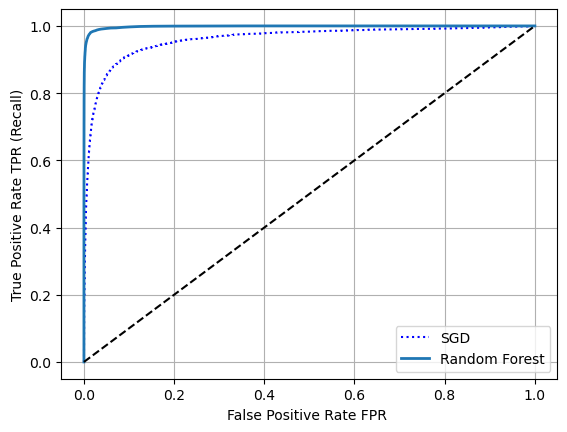

In [94]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [95]:
# The RandomForestClassifier’s ROC curve looks much
# better than the SGDClassifier’s: it comes much closer to the top-left corner.

In [96]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983296721818179

#support vector machine

In [98]:
from sklearn.svm import SVC

In [99]:
svm_clf = SVC()

In [100]:
svm_clf.fit(X_train,y_train)

SVC()

In [101]:
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [102]:
some_digit_scores = svm_clf.decision_function([some_digit])

In [103]:
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [104]:
np.argmax(some_digit_scores)

5

In [105]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [127]:
svm_clf.classes_[5]

5

In [129]:
from sklearn.multiclass import OneVsRestClassifier

In [138]:
ovr = OneVsRestClassifier(SVC())

In [142]:
ovr.fit(X_train,y_train)

OneVsRestClassifier(estimator=SVC())

In [143]:
ovr.predict([some_digit])

array([5], dtype=uint8)

In [150]:
len(ovr.estimators_)

10

In [152]:
sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=42)

In [153]:
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [156]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [158]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [159]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [161]:
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)

In [162]:
conf_mx = confusion_matrix(y_train,y_train_pred)

In [163]:
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

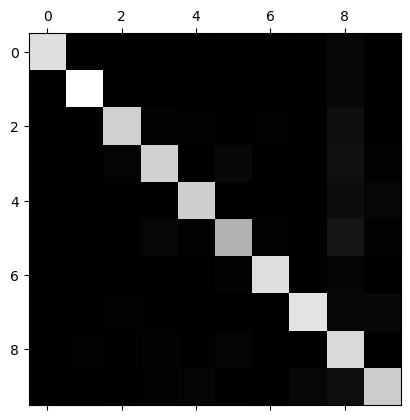

In [176]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()
# Since most images are on the main diagonal which means that they are classified corrcetly.
# The 5s looks slightly darker than the other digits, which could mean that there are fewer 
# images of 5s in the dataset or that the classsifier does not perform as well on 5s as on other digits.

In [179]:
row_sums = conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx = conf_mx/row_sums

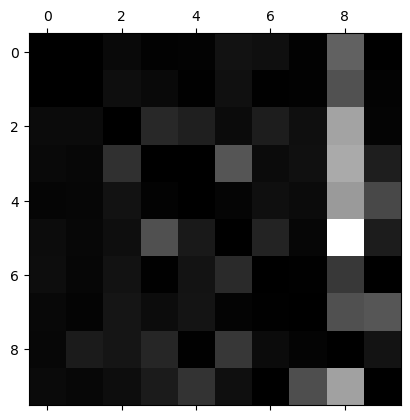

In [187]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

In [189]:
# Above the rows represent the actual classes and the columns represent predicted classes.

In [191]:
# The column for class8 is quite bright, which tells you that many images get misclassified 
# as 8s. However,the row for class 8 is not that bad, telling you that actual 8s in general 
# get properly classified as 8s.

In [197]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [199]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]



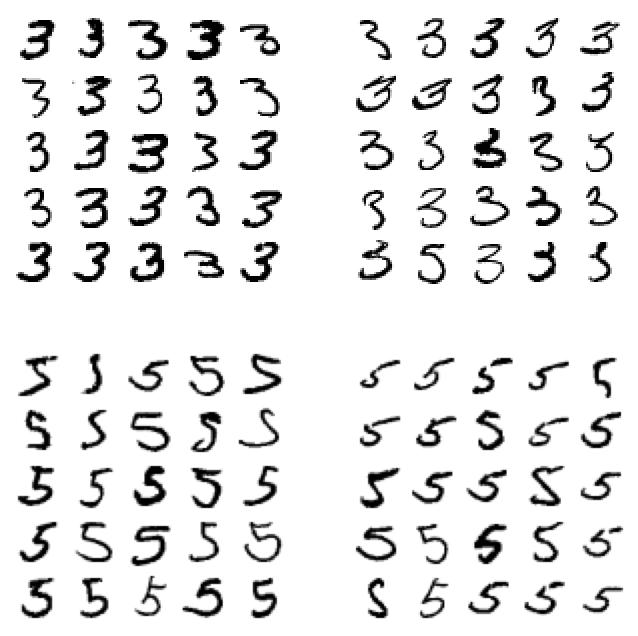

In [201]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [203]:
# it’s hard to understand why the classifier made the mis‐
# takes it did.3 The reason is that we used a simple SGDClassifier, which is a linear
# model. All it does is assign a weight per class to each pixel, and when it sees a new
# image it just sums up the weighted pixel intensities to get a score for each class. So
# since 3s and 5s differ only by a few pixels, this model will easily confuse them.

# Multilabel Classfication
A classification system that outputs multiple binary tags is
called a multilabel classification system.

In [229]:
from sklearn.neighbors import KNeighborsClassifier

In [239]:
# This code creates a y_multilabel array containing two target labels for each digit
# image: the first indicates whether or not the digit is large (7, 8, or 9), and the second
# indicates whether or not it is odd.
y_train_large = (y_train>=7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large,y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier()

In [245]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [247]:
y_train_knn_pred = cross_val_predict(knn_clf,X_train,y_multilabel,cv=3)

In [248]:
f1_score(y_multilabel,y_train_knn_pred,average="macro")

0.9764102655606048

Multioutput Classification
It is simply a generalization of multilabel classification where each label can be multiclass

In [257]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [265]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

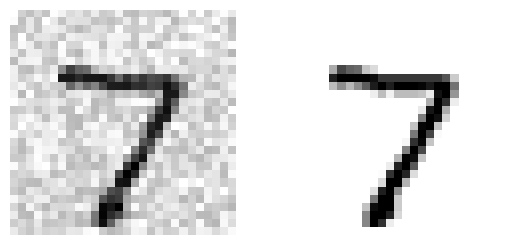

In [271]:
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.savefig("noisy_digit_example_plot.png")
plt.show()

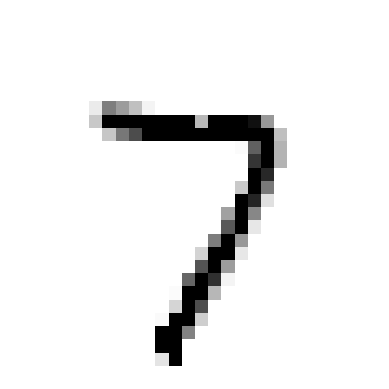

In [273]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)